In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# load data from google drive
import pandas as pd
URL ='https://drive.google.com/file/d/16uwjNLmG4bskMY2OGjft-BwHVjXhtgno/view?usp=sharing'
data = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(data,delimiter=',')

In [2]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-23,6820.0,6845.0,6775.0,6825.0,6708.140625,58360000
1,2021-02-24,6825.0,6835.0,6725.0,6725.0,6609.853027,71869000
2,2021-02-25,6740.0,6770.0,6680.0,6705.0,6590.195313,78688000
3,2021-02-26,6705.0,6810.0,6645.0,6710.0,6595.109863,173631500
4,2021-03-01,6830.0,7045.0,6800.0,7045.0,6924.373535,205539000
...,...,...,...,...,...,...,...
244,2022-02-17,7850.0,7925.0,7800.0,7900.0,7900.000000,48704600
245,2022-02-18,7950.0,7950.0,7850.0,7925.0,7925.000000,56813400
246,2022-02-21,7925.0,7975.0,7900.0,7950.0,7950.000000,43821700
247,2022-02-22,7900.0,7950.0,7850.0,7900.0,7900.000000,80095500


In [3]:
df=df.drop(columns=['Date', 'Adj Close'])
df

,Open,High,Low,Close,Volume
0,6820.0,6845.0,6775.0,6825.0,58360000
1,6825.0,6835.0,6725.0,6725.0,71869000
2,6740.0,6770.0,6680.0,6705.0,78688000
3,6705.0,6810.0,6645.0,6710.0,173631500
4,6830.0,7045.0,6800.0,7045.0,205539000
...,...,...,...,...,...
244,7850.0,7925.0,7800.0,7900.0,48704600
245,7950.0,7950.0,7850.0,7925.0,56813400
246,7925.0,7975.0,7900.0,7950.0,43821700
247,7900.0,7950.0,7850.0,7900.0,80095500


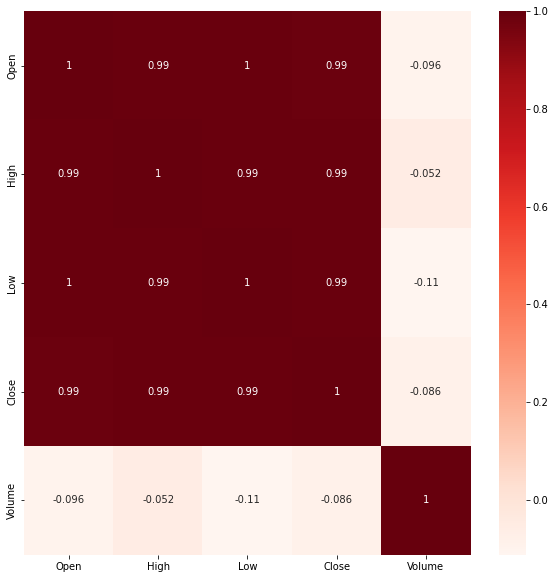

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
kolerasi=df.corr()
sns.heatmap(kolerasi, annot=True, cmap=plt.cm.Reds)

In [5]:
kolerasi

,Open,High,Low,Close,Volume
Open,1.000000,0.992029,0.995263,0.988907,-0.095613
High,0.992029,1.000000,0.992479,0.993342,-0.052262
Low,0.995263,0.992479,1.000000,0.994763,-0.112865
Close,0.988907,0.993342,0.994763,1.000000,-0.086170
Volume,-0.095613,-0.052262,-0.112865,-0.086170,1.000000


In [6]:
kor_target = abs(kolerasi['Close'])
relevan = kor_target[kor_target>0.9]
relevan

Open     0.988907
High     0.993342
Low      0.994763
Close    1.000000
Name: Close, dtype: float64

In [7]:
X = df[['Open',	'High',	'Low']]
y = df['Close']

In [8]:
X

,Open,High,Low
0,6820.0,6845.0,6775.0
1,6825.0,6835.0,6725.0
2,6740.0,6770.0,6680.0
3,6705.0,6810.0,6645.0
4,6830.0,7045.0,6800.0
...,...,...,...
244,7850.0,7925.0,7800.0
245,7950.0,7950.0,7850.0
246,7925.0,7975.0,7900.0
247,7900.0,7950.0,7850.0


In [9]:
y

0      6825.0
1      6725.0
2      6705.0
3      6710.0
4      7045.0
        ...  
244    7900.0
245    7925.0
246    7950.0
247    7900.0
248    8050.0
Name: Close, Length: 249, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.20)

In [11]:
X_train.shape

(199, 3)

In [12]:
y_test.shape

(50,)

In [13]:
y_test #data test blm masuk proses learning

array([6430., 7675., 6490., 6300., 6720., 6580., 7000., 6280., 6025.,
       6705., 6560., 7700., 7725., 6495., 6345., 7475., 7375., 7475.,
       6540., 6340., 6945., 7575., 6045., 6020., 7700., 7375., 6420.,
       6585., 7500., 6600., 6705., 6725., 6400., 7475., 6600., 7180.,
       6200., 6330., 6760., 6135., 6520., 7625., 6045., 6190., 6600.,
       6110., 6765., 7425., 7750., 6355.])

In [14]:
from sklearn.tree import DecisionTreeRegressor

model_dt= DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
prediksi = model_dt.predict(X_test)

In [16]:
prediksi

array([6530., 7675., 6520., 6160., 6960., 6550., 6960., 6210., 6025.,
       6705., 6470., 7725., 7725., 6530., 6375., 7400., 7275., 7450.,
       6520., 6375., 6760., 7575., 6055., 5990., 7700., 7375., 6425.,
       6590., 7350., 6590., 6620., 6825., 6380., 7425., 6585., 7015.,
       6165., 6275., 6665., 6165., 6550., 7800., 6110., 6235., 6590.,
       6100., 6760., 7325., 7875., 6410.])

In [17]:
prediksi[-1]

6410.0

In [18]:
y_test[-1]

6355.0

In [19]:
#Open	High	Low
model_dt.predict([['35000', '35000', '32980']])

array([8050.])

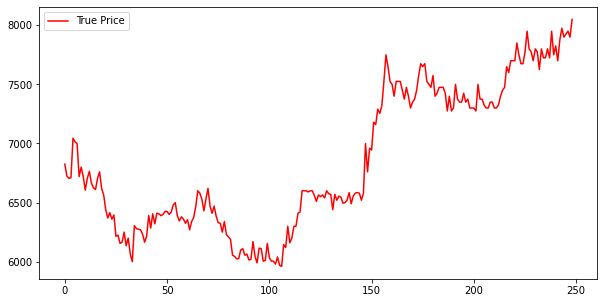

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(df['Close'].values, color='red', label='True Price')
plt.legend()

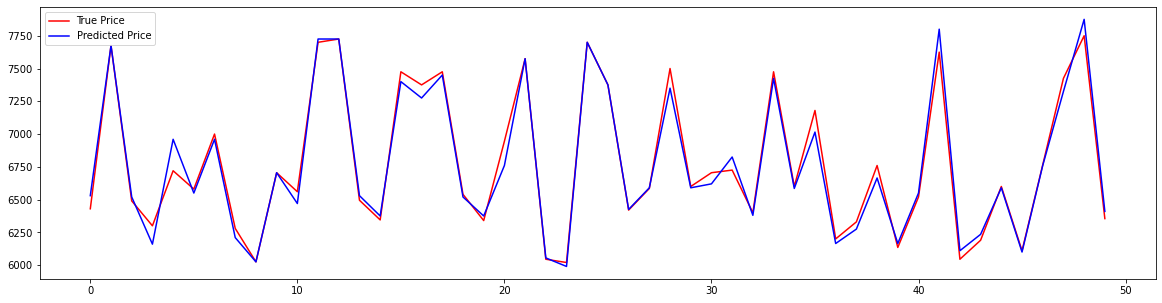

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(y_test, color='red', label='True Price') #harga saham yg belum di prediksi
plt.plot(prediksi, color='blue', label='Predicted Price') #harga saham sudah masuk proses machine learning
plt.legend()